In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

sys.path.insert(0, '../../src/helper')
import zbp_visualizer

# Data

In [2]:
file_path = '../../src/data/temp/zbp_totals_with_features.csv'
data = pd.read_csv(file_path).select_dtypes(include='number')
data.head()

,zip,emp,qp1,ap,est,year,naics_11_pct,naics_21_pct,naics_22_pct,naics_23_pct,...,n50_99_pct,n100_249_pct,n250_499_pct,n500_999_pct,n1000_pct,median_hh_income,total_population,total_midcareer (25-34),total_midcareer (35-44),total_retirement
0,91901,4141,36304,174786,391,2012,0.000000,0.000000,0.000000,0.225064,...,0.010230,0.005115,0.002558,0.0,0.002558,76496,17034.0,1441,2011,2691
1,91902,2265,19111,81569,349,2012,0.002865,0.000000,0.000000,0.137536,...,0.017192,0.002865,0.000000,0.0,0.000000,86099,17659.0,1785,2246,3485
2,91906,0,0,0,27,2012,0.000000,0.000000,0.074074,0.259259,...,0.000000,0.000000,0.037037,0.0,0.000000,54135,3679.0,559,277,395
3,91910,19799,200767,805325,1458,2012,0.000686,0.000000,0.002058,0.052812,...,0.021262,0.013032,0.002743,0.0,0.001372,55875,73761.0,10262,9164,9195
4,91911,17517,147205,628514,1274,2012,0.000000,0.000785,0.000785,0.073783,...,0.029042,0.014914,0.003925,0.0,0.000785,49677,82708.0,10660,10944,9891


# Coorelation Matrix

In [3]:
corr = data.corr()
corr = corr[['est']].sort_values('est', ascending=False)
vmin = corr.min()
vmax = corr.max()
corr_thresh = corr.abs().sort_values('est', ascending=False).iloc[13]['est']
corr = corr[corr['est'].abs() > corr_thresh]
print(f'top {corr.shape[0]} features:')
corr.style.background_gradient(cmap='coolwarm', vmin=vmin, vmax=vmax)

top 13 features:


,est
est,1.000000
emp,0.860760
ap,0.691398
qp1,0.685683
n20_49_pct,0.559610
naics_55_pct,0.519999
n50_99_pct,0.498924
total_midcareer (25-34),0.452463
naics_51_pct,0.451589
n100_249_pct,0.445653


# Establishment Growth

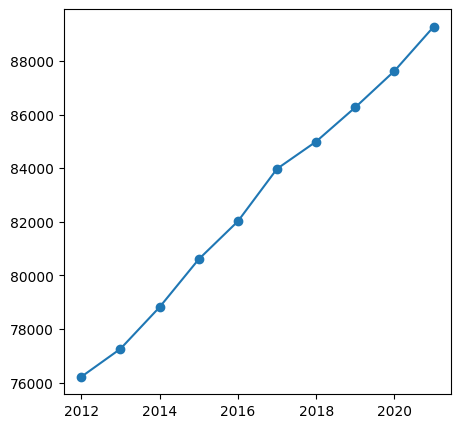

In [4]:
sum_establishments_by_year = data.groupby('year')['est'].sum().reset_index()

plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(5, 5))
plt.plot(sum_establishments_by_year['year'], sum_establishments_by_year['est'], marker='o', linestyle='-', color='tab:blue')
# plt.xticks(np.arange(2012, 2021 + 1))

# plt.title('Establishments Growth (2012-2021)')
# plt.xlabel('Year')
# plt.ylabel('Establishments')
# plt.grid(True)
plt.savefig('../../out/plots/est_plot.jpg', dpi=500, bbox_inches='tight', pad_inches=0)

# Geographical Distribution of Values - GeoPlots

In [16]:
with pd.option_context('mode.chained_assignment', None):
    data_small_businesses = data[['zip']]
    data_small_businesses['small_bus'] = data.filter(regex='n\d+.*_pct').iloc[:,:-2].sum(axis=1)
    data_big_businesses = data[['zip']]
    data_big_businesses['big_bus'] = data.filter(regex='n\d+.*_pct').iloc[:,-2:].sum(axis=1)

data_big_businesses = data_big_businesses.groupby('zip').mean()
data_big_businesses = (data_big_businesses - data_big_businesses.mean())/data_big_businesses.std()
data_big_businesses = data_big_businesses.reset_index()

data_small_businesses = data_small_businesses.groupby('zip').mean()
data_small_businesses = (data_small_businesses - data_small_businesses.mean())/data_small_businesses.std()
data_small_businesses = data_small_businesses.reset_index()

In [17]:
out_path = f'../../out/plots/zbp_plot_small_bus.html'
zbp_visualizer.generate_zbp_chloropleth(data_small_businesses, 'zip', 'small_bus', out_path)
IFrame(out_path, 500,500)

In [18]:
out_path = f'../../out/plots/zbp_plot_big_bus.html'
zbp_visualizer.generate_zbp_chloropleth(data_big_businesses, 'zip', 'big_bus', out_path)
IFrame(out_path, 500,500)

# Range of Feature Values - Violin Plots

In [7]:
def gen_violin_plot(df, cols):
    
    plt.rcParams.update({'font.size': 14})
#     plt.rcParams['font.weight'] = 'bold'
    
    temp = df.groupby('zip')[cols].mean()
    train_mean = temp.mean()
    train_std = temp.std()
    df_std = (temp - train_mean) / train_std
    df_std = df_std.rename(columns={'total_midcareer (25-34)': 'total_midcareer',
                                    'naics_62_pct': 'health_industry',
                                    'naics_54_pct': 'mngmt_industry',
                                    'emp': 'employee_count'})
    df_std = df_std.melt(var_name='Column', value_name='Normalized')
    plt.figure(figsize=(20, 5))
    ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('')
    
    return ax

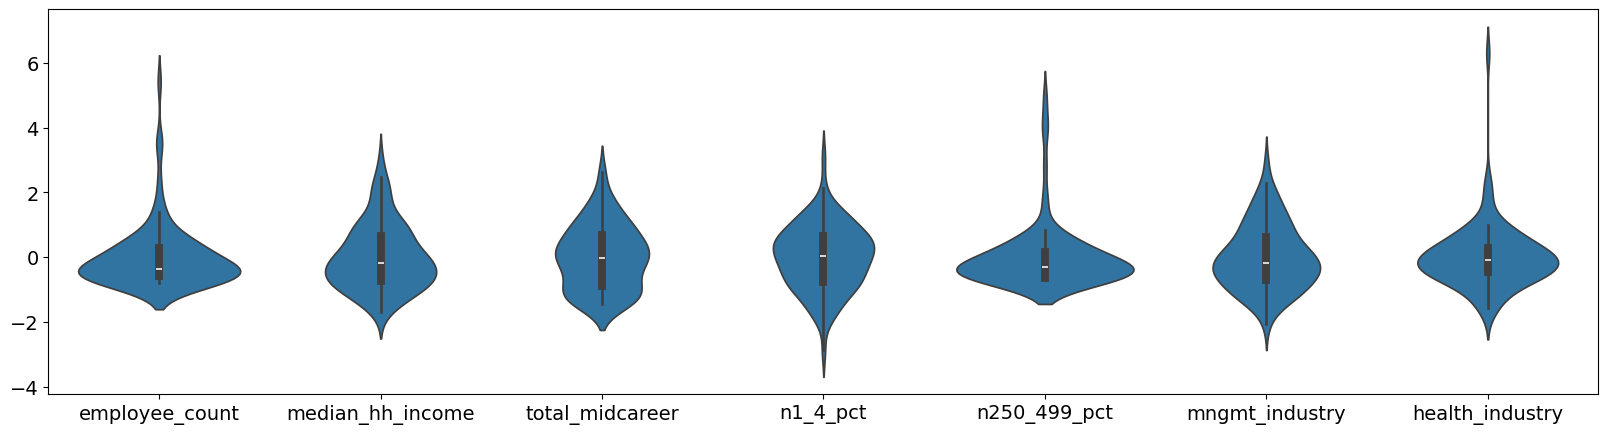

In [8]:
violin_cols = ['emp', 'median_hh_income', 'total_midcareer (25-34)',
               'n1_4_pct', 'n250_499_pct',
               'naics_54_pct', 'naics_62_pct']
gen_violin_plot(data, violin_cols)
plt.savefig('../../out/plots/violin_plots.jpg', dpi=500, bbox_inches='tight', pad_inches=0)

<Axes: >

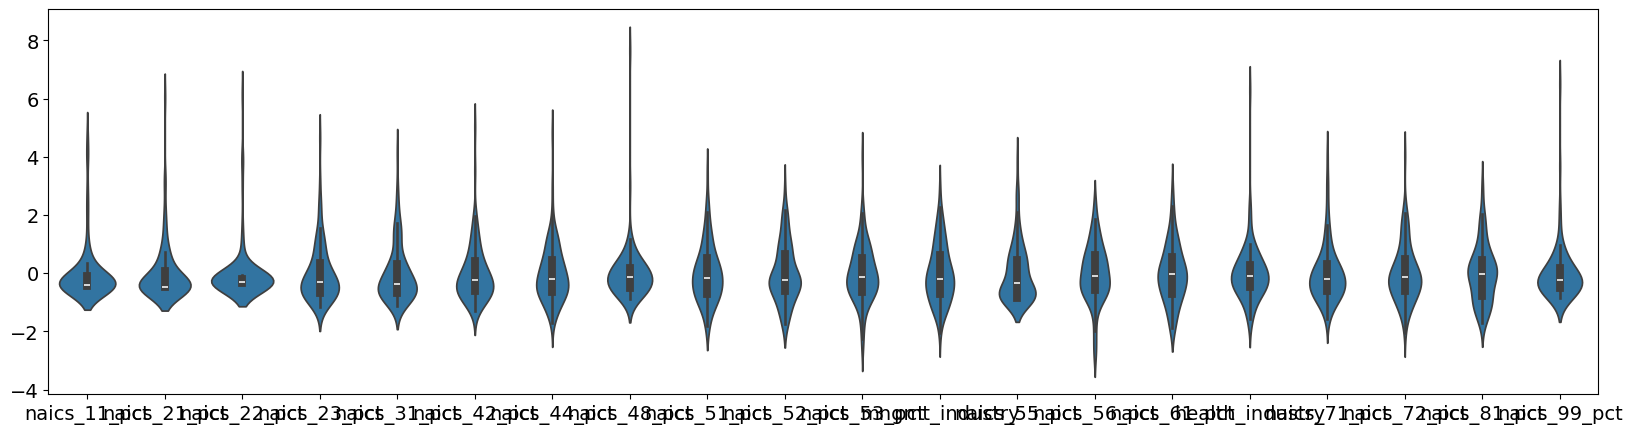

In [9]:
violin_cols = ['naics_11_pct', 'naics_21_pct',
       'naics_22_pct', 'naics_23_pct', 'naics_31_pct', 'naics_42_pct',
       'naics_44_pct', 'naics_48_pct', 'naics_51_pct', 'naics_52_pct',
       'naics_53_pct', 'naics_54_pct', 'naics_55_pct', 'naics_56_pct',
       'naics_61_pct', 'naics_62_pct', 'naics_71_pct', 'naics_72_pct',
       'naics_81_pct', 'naics_99_pct']
gen_violin_plot(data, violin_cols)

<Axes: >

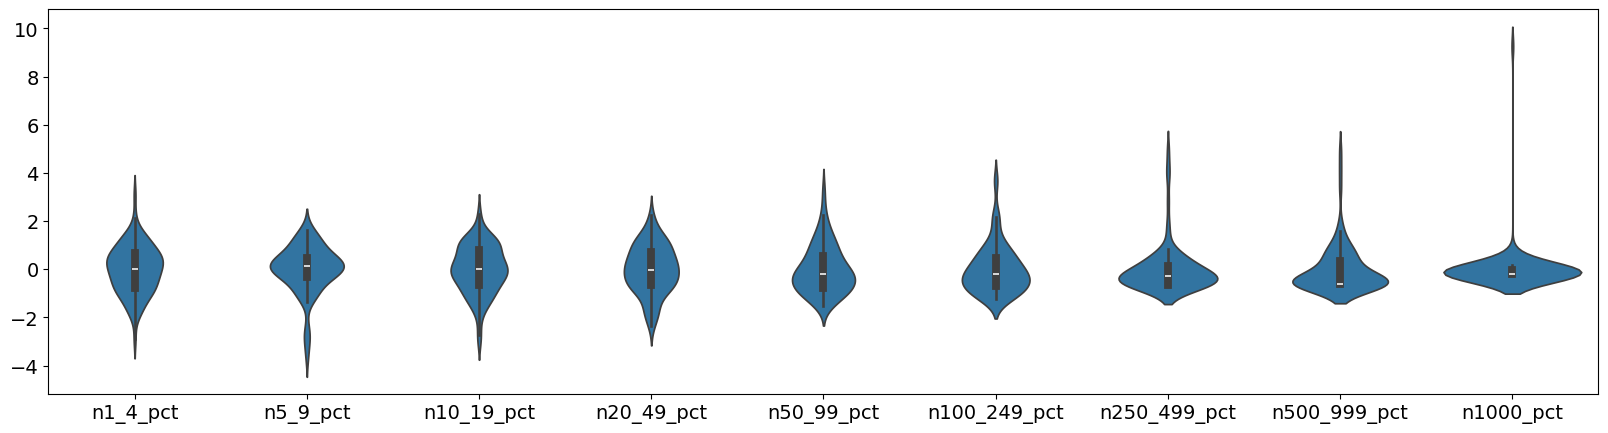

In [10]:
violin_cols = ['n1_4_pct', 'n5_9_pct', 'n10_19_pct',
       'n20_49_pct', 'n50_99_pct', 'n100_249_pct', 'n250_499_pct',
       'n500_999_pct', 'n1000_pct']
gen_violin_plot(data, violin_cols)

# Temporal Distribution of Values - ZCTA Averaged Lineplots

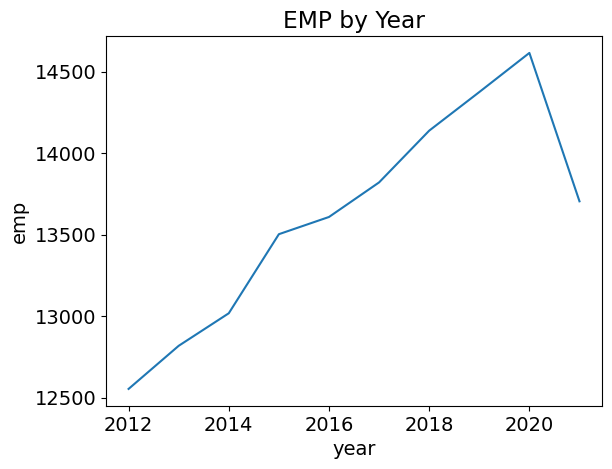

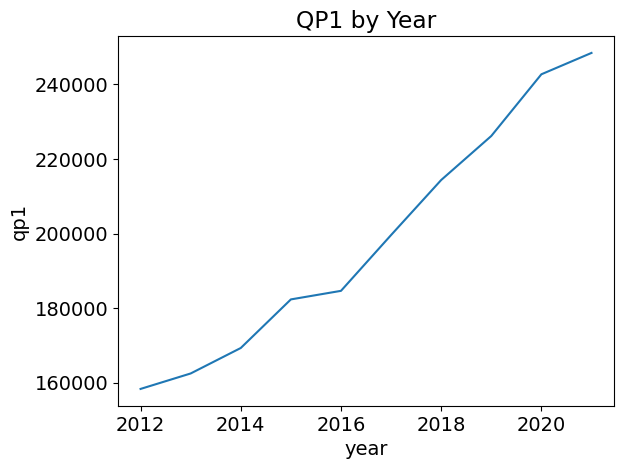

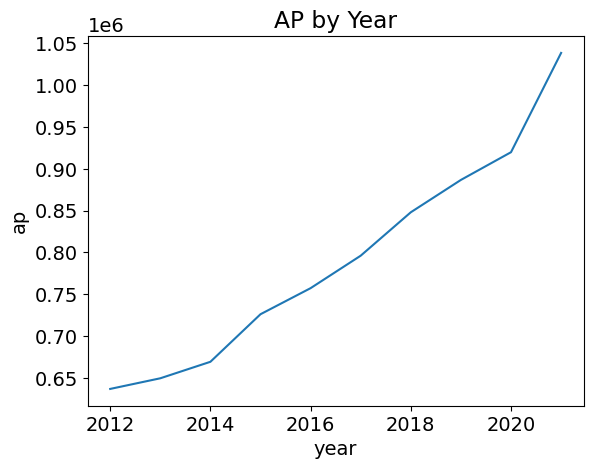

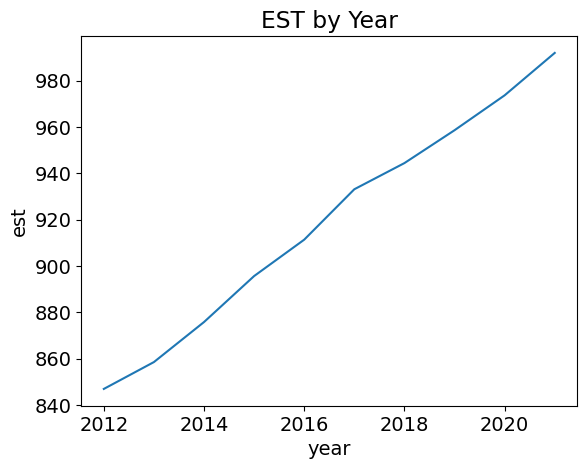

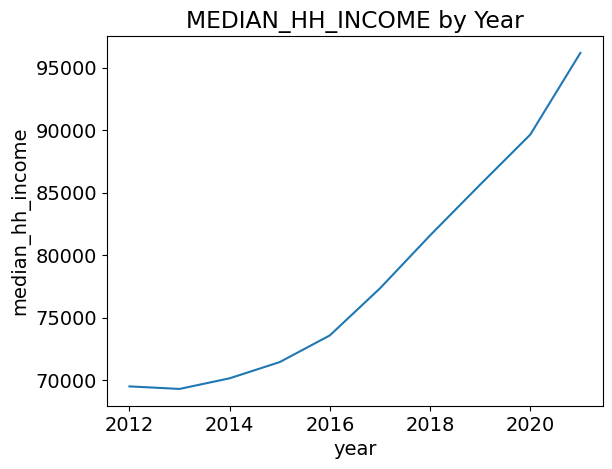

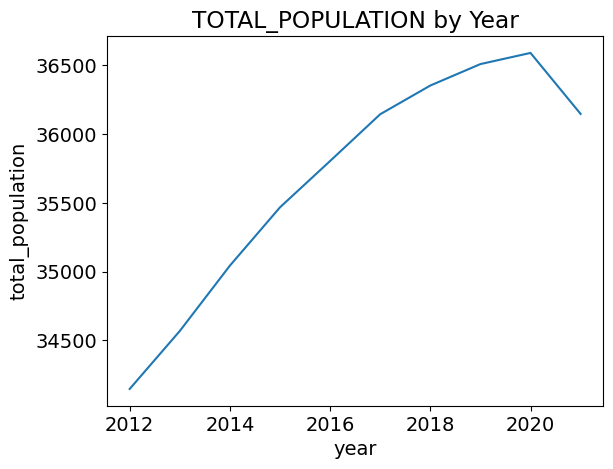

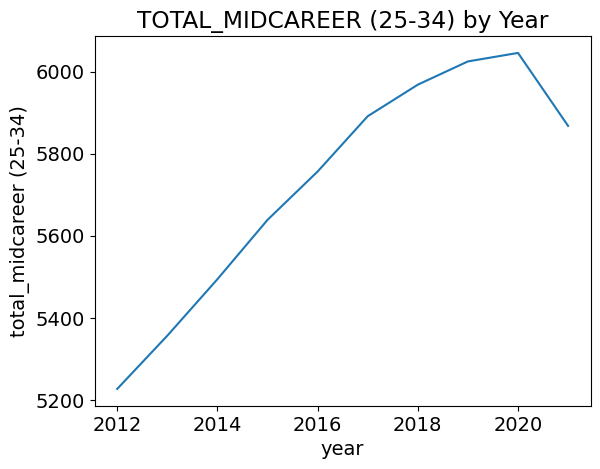

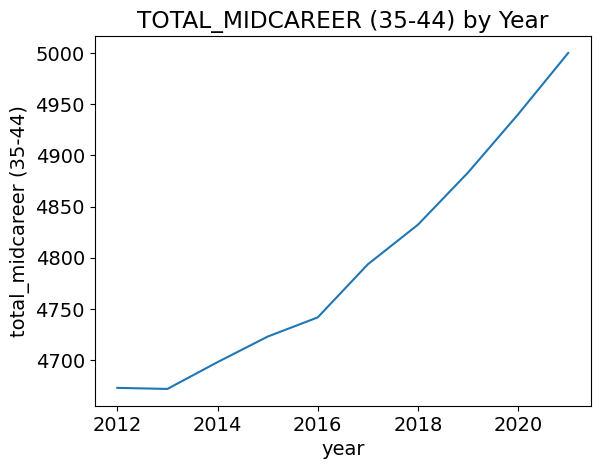

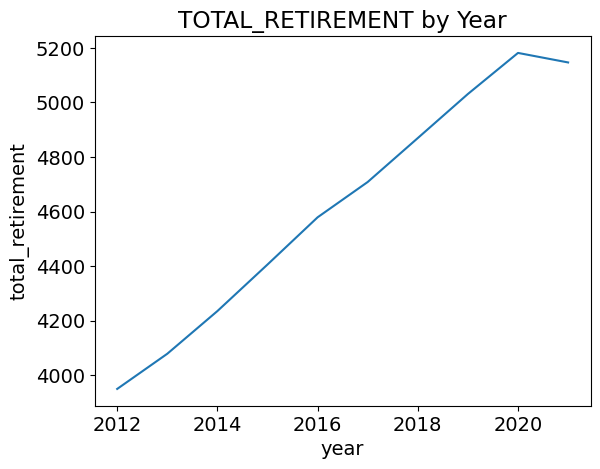

In [11]:
line_cols = data.filter(regex='^((?!naics).)*$').filter(regex='^((?!pct).)*$')
for col in line_cols:
    if col not in ['zip', 'year']:
        
        fig, ax = plt.subplots()
        ax = data.groupby('year')[col].mean().plot()
        ax.set_title(f'{col.upper()} by Year')
        ax.set_ylabel(col)

Text(0.5, 1.0, 'TOTAL_MIDCAREER by Year')

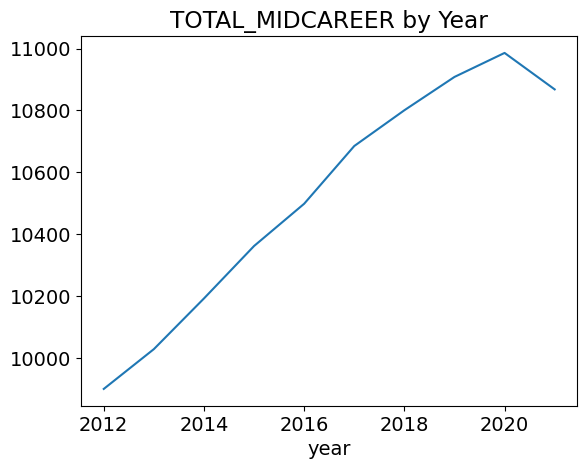

In [12]:
ax = data.groupby('year')[['total_midcareer (25-34)', 'total_midcareer (35-44)']].mean().sum(axis=1).plot()
ax.set_title('TOTAL_MIDCAREER by Year')

## Distribution of Business Sizes

<Axes: >

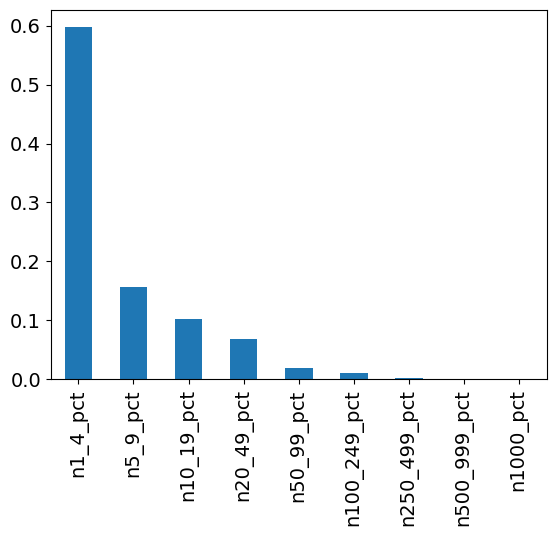

In [13]:
data[['n1_4_pct', 'n5_9_pct', 'n10_19_pct', 'n20_49_pct', 'n50_99_pct',
       'n100_249_pct', 'n250_499_pct', 'n500_999_pct', 'n1000_pct']].mean().plot(kind='bar')

## Distrubution of Business Industries

<Axes: >

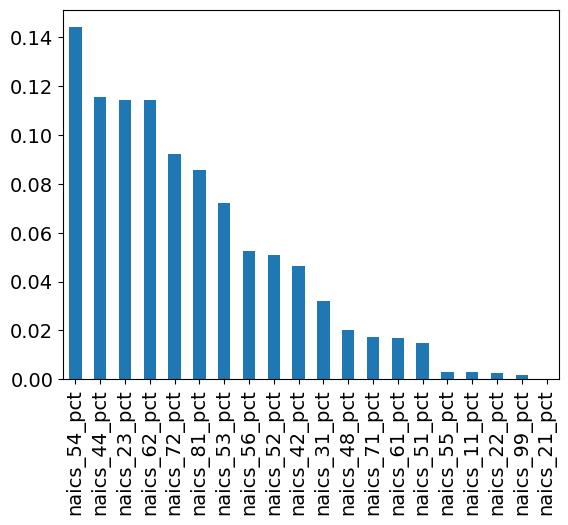

In [14]:
data[['naics_11_pct', 'naics_21_pct', 'naics_22_pct', 'naics_23_pct',
       'naics_31_pct', 'naics_42_pct', 'naics_44_pct', 'naics_48_pct',
       'naics_51_pct', 'naics_52_pct', 'naics_53_pct', 'naics_54_pct',
       'naics_55_pct', 'naics_56_pct', 'naics_61_pct', 'naics_62_pct',
       'naics_71_pct', 'naics_72_pct', 'naics_81_pct', 'naics_99_pct']].mean().sort_values(ascending=False).plot(kind='bar')

## Unemployment Over The Years

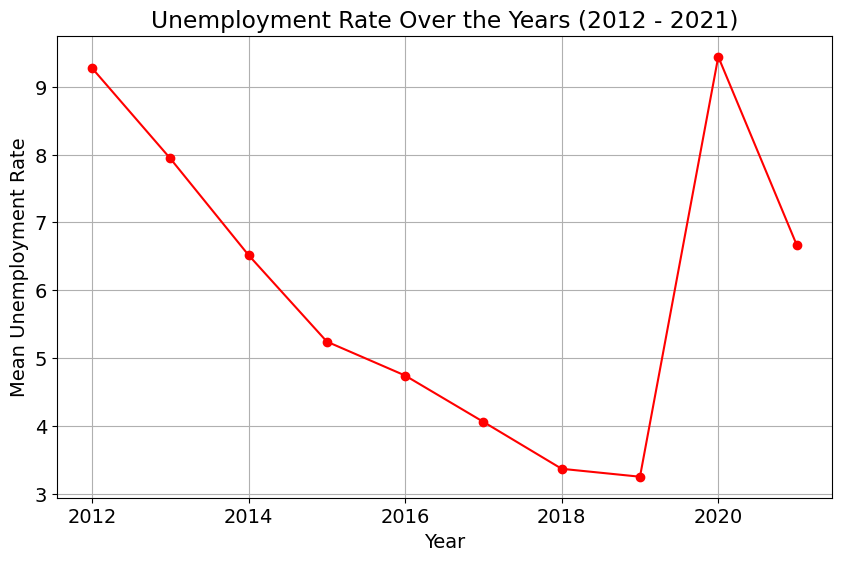

In [15]:
file_path = '../../src/data/raw/employment_data/employment.csv'
employment_rate = pd.read_csv(file_path)

# Only get the year
employment_rate['year'] = pd.to_datetime(employment_rate['DATE']).dt.year

employment_rate = employment_rate.drop(columns=['DATE','CASAND5URN_20240104'])

employment_rate.rename(columns={'CASAND5URN_20231130': 'unemployment_rate'}, inplace=True)

unemployment_by_year = employment_rate.groupby('year')['unemployment_rate'].mean().reset_index()


unemployment_rate_over_years = unemployment_by_year.groupby('year')['unemployment_rate'].mean()


plt.figure(figsize=(10, 6))
unemployment_rate_over_years.plot(marker='o', linestyle='-', color='r')
plt.title('Unemployment Rate Over the Years (2012 - 2021)')
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate')
plt.grid(True)
plt.show()